# Bayes thơ ngây

## Câu 1

       Petal Length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 93.333


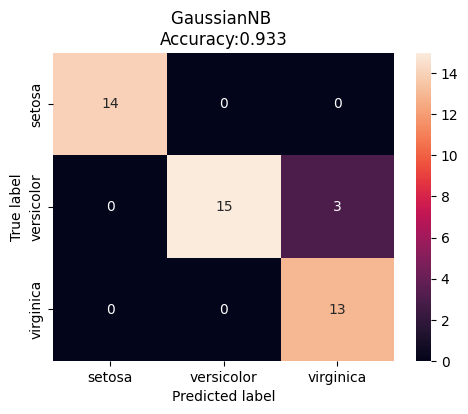

Nhãn dự đoán: [0]
Xác suất của nhãn: [[1.00000000e+00 2.18257009e-23 1.16924387e-26]]


c:\Users\DangHuynh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\DangHuynh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [1]:
# Nạp các gói thư viện cần thiết 
import pandas as pd 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import datasets 
from sklearn.model_selection import train_test_split 
# Đọc dữ liệu iris từ thư viện scikit-learn 
iris = datasets.load_iris() 
#print(iris) 
columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"]; 
X = pd.DataFrame(iris.data, columns=columns) 
y = iris.target 
print(X.describe()) 
# Sử dụng nghi thức kiểm tra hold-out 
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con: 
# training set và test set theo tỷ lệ 70/30 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
#print(X_train.shape, y_train.shape) 
#print(X_test.shape, y_test.shape) 
 
# Xây dựng mô hình phân loại dữ liệu 
model = GaussianNB() 
model.fit(X_train, y_train) 
 
# Dự đoán nhãn tập kiểm tra 
y_pred = model.predict(X_test) 
#print(y_pred) 
 
# Tính độ chính xác 
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % 
(accuracy_score(y_test, y_pred)*100)) 
 
cm = confusion_matrix(y_test, y_pred) 
 
# Chuyển confusion-matrix về data frame phục vụ cho việc vẽ đồ thị 
cm_df = pd.DataFrame(cm, 
                    index=['setosa', 'versicolor', 'virginica'], 
                    columns=['setosa', 'versicolor', 'virginica']) 
 
plt.figure(figsize=(5.5, 4)) 
sns.heatmap(cm_df, annot=True) 
plt.title('GaussianNB \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
y_pred))) 
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.show()

# Dữ liệu cần dự đoán
sample = [[5.0, 3.5, 1.5, 0.2]]

# Dự đoán nhãn
sample_pred = model.predict(sample)

# Tính xác suất của nhãn
sample_pred_proba = model.predict_proba(sample)

print(f"Nhãn dự đoán: {sample_pred}")
print(f"Xác suất của nhãn: {sample_pred_proba}")

## Câu 2

In [18]:
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

model = GaussianNB()

# Number of iterations
n_iterations = 10

# Store accuracy in a list
accuracy_list = []

for _ in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Calculate average accuracy
average_accuracy = np.mean(accuracy_list)

print(f"Độ chính xác trung bình sau {n_iterations} lần chạy: {average_accuracy*100}")

Độ chính xác trung bình sau 10 lần chạy: 96.66666666666666


## Câu 3

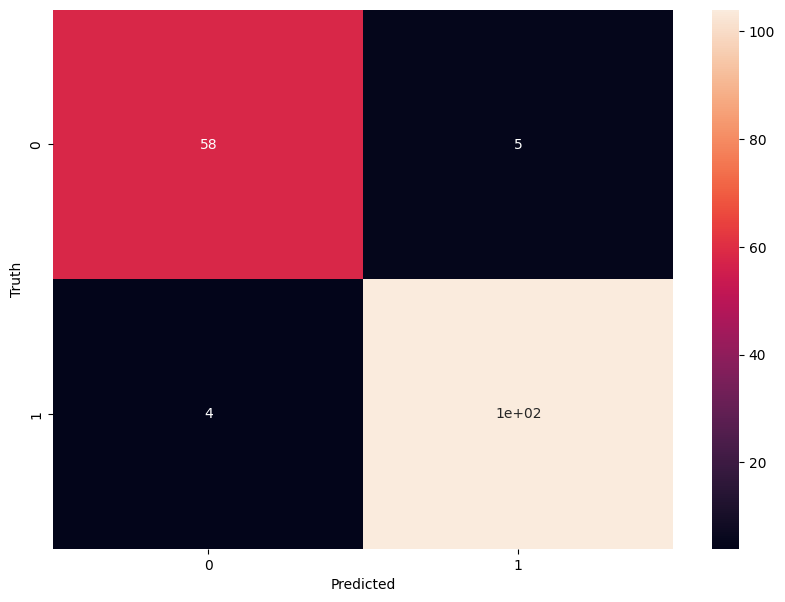

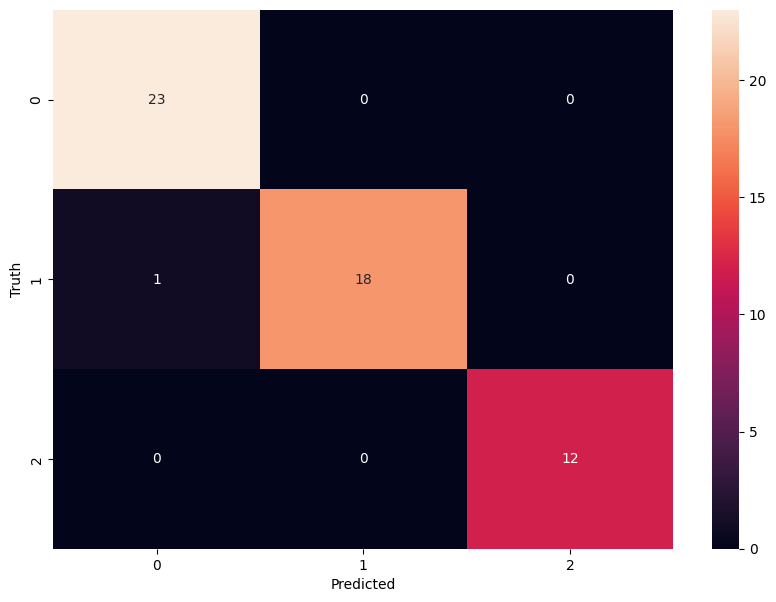

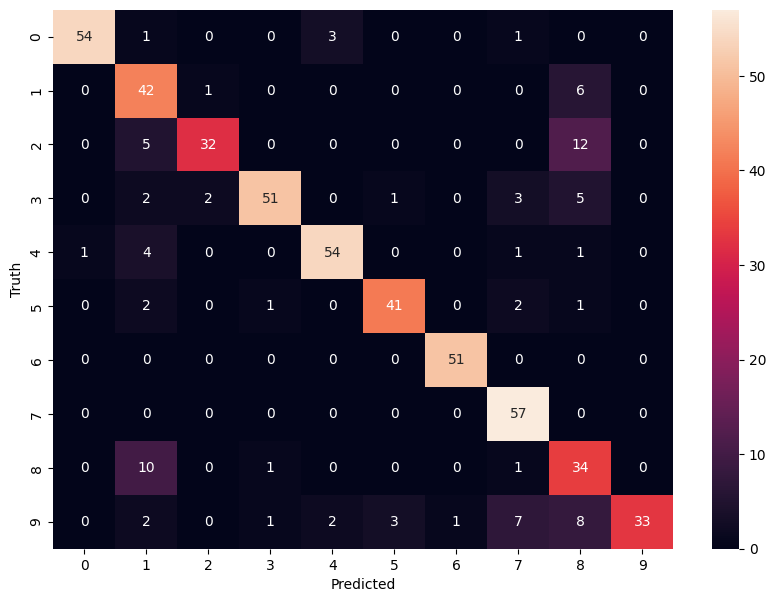

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
breast_cancer = datasets.load_breast_cancer()
wine = datasets.load_wine()
digits = datasets.load_digits()

datasets = {
    'Breast Cancer Wisconsin': breast_cancer,
    'Wine': wine,
    'Optical recognition of handwritten digits': digits
}

# Initialize Gaussian Naive Bayes
model = GaussianNB()

for name, dataset in datasets.items():
    X, y = dataset.data, dataset.target

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Train the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
